# Eastvantage Data Engineering Assignment
### By Vivek CP
#### cpvivek1@gmail.com
#### 8921657853




**If interested you can find the video explanation of this assignment here: https://www.loom.com/share/c094735d511d479c8295bdbb43ff5ddf?sid=85a093d1-0719-4b58-a6b4-896ce04a4964**


### Scenario:

Company XYZ held a promo sale for their signature items named: x,y,z. Sales are at an
all-time high, but they want to create a marketing strategy to target age groups of people by
looking at total quantities purchased.
They then created a database with these business rules:

•A sales receipt can have multiple items in an order.

• For every order, the clerk records all quantities for all items, including items not
bought (which they denote with quantity=NULL).

• Each customer can do multiple sales transactions, and has his/her age stored in a
database.


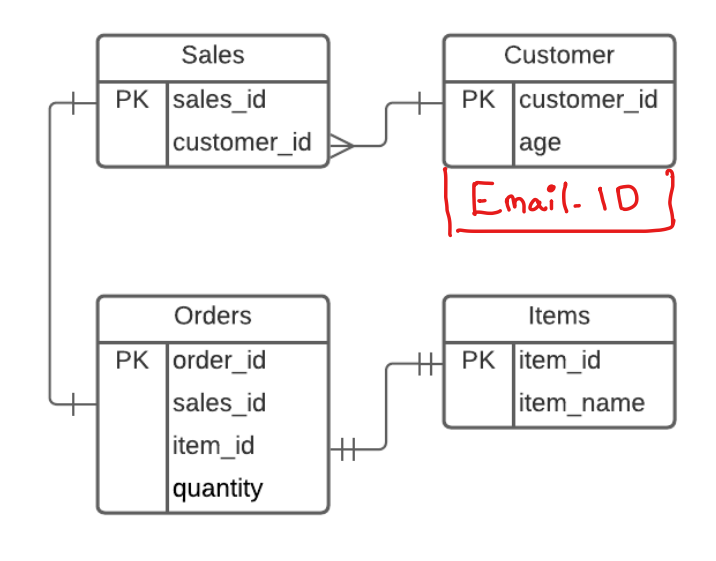
    



**Something I noticed worth mentioning is that the Customer table should ideally have at least one differentiating feature like email id for instance. This is required to make differentiations between the revisits of a particular customer. With just cust_id and age of the customer we can not determine if a particular customer is a repeat customer or not. Therefore we might end up assigning different customer_id to the same customer for different transactions.**

## Solution:

The assignment has been completed using following components:
1. Sqlite 3 to create the database.
2. Python to impliment the logic to maintain the business rules integrity.
3. Pandas and SQL to carry out data querying.

## Creating the database

I've primarily used SQliteStudio 3.4.4 to carry out the database creation owing to the friendly user interface. The required tables can be created using the interactive featuers of SQLiteStudio or using the following queries: 

In [ ]:
CREATE TABLE Customers (
    customer_id INTEGER PRIMARY KEY AUTOINCREMENT,
    age INTEGER
);

CREATE TABLE Sales (
    Sales_Id INTEGER PRIMARY KEY AUTOINCREMENT, #using autoincrement aids in avoiding having to specify ID every time we are entering a new sales entry
    Customer_Id INTEGER,
    FOREIGN KEY(customer_id) REFERENCES Customers(Customer_Id)
);

CREATE TABLE Orders (
    Order_Id INTEGER PRIMARY KEY AUTOINCREMENT,
    Sales_Id INTEGER,
    Item_Id INTEGER,
    Quantity INTEGER,
    FOREIGN KEY(Sales_Id) REFERENCES Sales(Sales_id),
    FOREIGN KEY(Item_Id) REFERENCES Items(Item_Id)
);

CREATE TABLE Items (
    Item_Id INTEGER PRIMARY KEY AUTOINCREMENT,
    Item_Name TEXT
);


## Data insertion keeping in mind the business rules

Once done with creation of the database, next step would be to connect it to the python environment, insert data into the tables, and perform data exploration. 

### Flow of data insertion:

1. Collect Customer Age:
    - The user(clerk) would be prompted to enter the customer's age
    - This would make an entry to the Customer Table along with a Customer_Id automatically using autoincrement.
2. Create New Sale Entry:
    - A new sale record would be created using the Customer_Id along with a Sales_Id
    - This Sales_Id would be used to link Orders to this sale.
3. Entering Items:
    - Since a single transaction is allowed to contain more than one product, we'll use a while loop to take in multiple item entries in a single sale reciept.
    - This would be followed by retrieving the order quantity as well. 
    - Checking the existence of the item in the Item table is essential as well. If not present, the program should make a new entry in the Items table and assign a unique ID to it.  
4. Insert Order Record:
    - This has to be the final entry in the sequence since the Order table has references from both - Sales, and Item tables. 
    


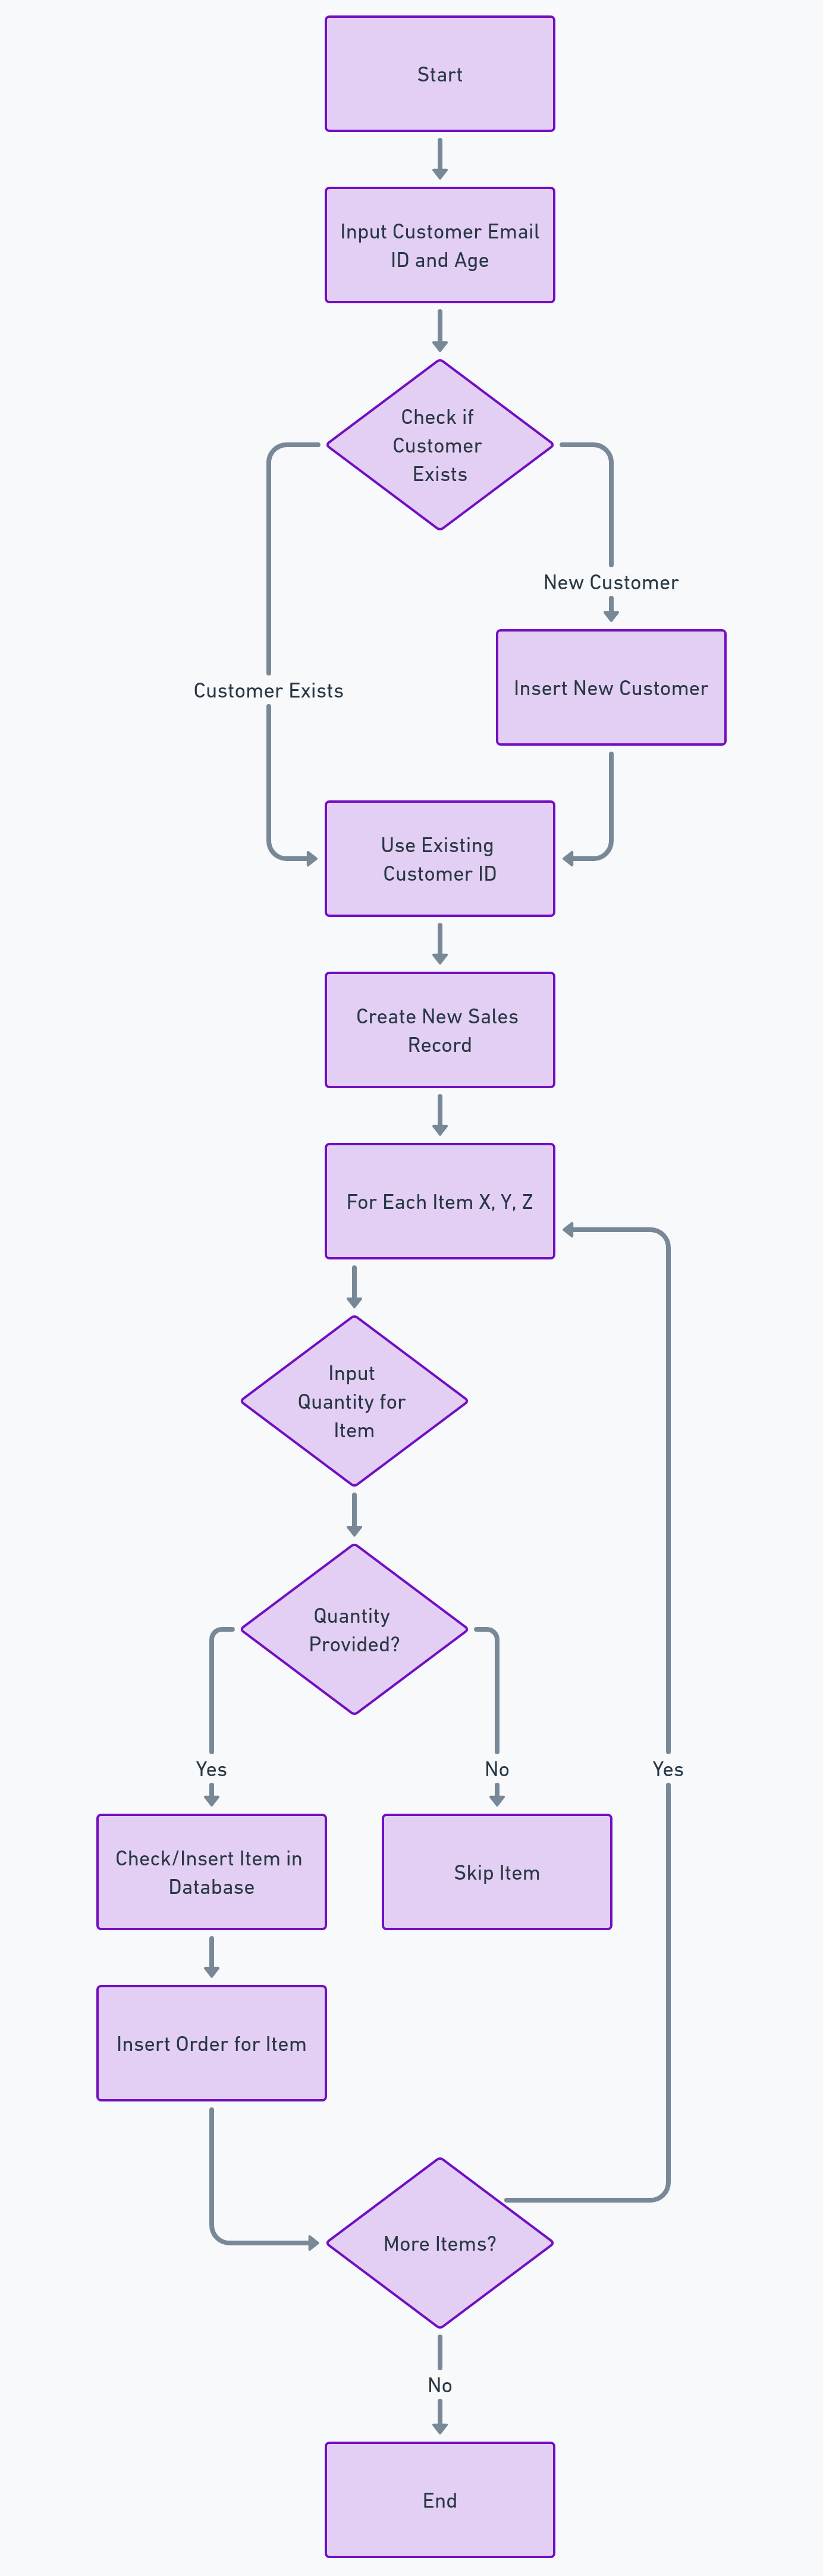

## Implementing Data Insertion Application

Let's insert the test cases as mentioned in the assignment:
- Customer 1 bought Item X on multiple occasions, totaling 10 for Item X only
- Customer 2 bought one of each item only once, totaling 1 each Item
- Customer 3 bought Item Z on two occasions, totaling 2 for Item Z only

The following code will have to be executed for each sales transaction

In [83]:
import sqlite3

def connect_to_db(db_path):
    """Connect to the SQLite database."""
    conn = sqlite3.connect("C:\\Users\\HP\\Downloads\\Assignments - 2024\\East Vantage\\eastvantagesales.db")
    return conn

def get_or_create_customer(conn, age, email_id):
    """Get an existing customer's ID by email or create a new customer."""
    cur = conn.cursor()
    cur.execute("SELECT customer_id FROM Customers WHERE email_id = ?", (email_id,))
    customer = cur.fetchone()
    if customer:
        return customer[0]
    else:
        cur.execute("INSERT INTO Customers(age, email_id) VALUES(?, ?)", (age, email_id))
        conn.commit()
        return cur.lastrowid

def get_or_create_item(conn, item_name):
    """Get an existing item's ID by name or create a new item."""
    cur = conn.cursor()
    cur.execute("SELECT item_id FROM Items WHERE item_name = ?", (item_name,))
    item = cur.fetchone()
    if item:
        return item[0]
    else:
        cur.execute("INSERT INTO Items(item_name) VALUES(?)", (item_name,))
        conn.commit()
        return cur.lastrowid

def create_sale(conn, customer_id):
    """Create a new sale record for the customer."""
    cur = conn.cursor()
    cur.execute("INSERT INTO Sales(customer_id) VALUES(?)", (customer_id,))
    conn.commit()
    return cur.lastrowid

def insert_order(conn, sales_id, item_id, quantity):
    """Insert a new order linked to a sale and an item."""
    cur = conn.cursor()
    cur.execute("INSERT INTO Orders(sales_id, item_id, quantity) VALUES(?, ?, ?)", (sales_id, item_id, quantity))
    conn.commit()

def main(db_path):
    conn = connect_to_db("C:\\Users\\HP\\Downloads\\Assignments - 2024\\East Vantage\\eastvantagesales.db")
    
    try:
        email_id = input("Enter Customer's Email ID: ").strip()
        age = int(input("Enter Customer's Age: "))
        customer_id = get_or_create_customer(conn, age, email_id)
        
        sales_id = create_sale(conn, customer_id)
        
        # Ask for quantities of items X, Y, Z and insert orders with NULL quantity for items not bought
        for item in ['X', 'Y', 'Z']:
            quantity_input = input(f"Enter Quantity for {item} (leave blank if not bought): ").strip()
            quantity = int(quantity_input) if quantity_input.isdigit() else None  # Converts blank input to None
            
            item_id = get_or_create_item(conn, item)
            insert_order(conn, sales_id, item_id, quantity)  # Inserts order with quantity as None if not bought
    
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:
        conn.close()


if __name__ == "__main__":
    db_path = 'C:\\Users\\HP\\Downloads\\Assignments - 2024\\East Vantage\\eastvantagesales.db"'  # Update this path
    main(db_path)


Enter Customer's Email ID: cust3@gmail.com
Enter Customer's Age: 35
Enter Quantity for X (leave blank if not bought): 
Enter Quantity for Y (leave blank if not bought): 
Enter Quantity for Z (leave blank if not bought): 1


## Data Exploration

Let's approach the problem statement given in the assignment:

1. extract the total quantities of each item bought per customer aged 18-35.
- For each customer, get the sum of each item
- Items with no purchase (total quantity=0) should be omitted from the final list
- No decimal points allowed (The company doesn’t sell half of an item ;) )
- Challenge: Provide 2 solutions, one using purely SQL, the other using Pandas

2. store the query to a CSV file, delimiter should be the semicolon character (';')


In [16]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect("C:\\Users\\HP\\Downloads\\Assignments - 2024\\East Vantage\\eastvantagesales.db") 


In [78]:
#Let's try looking into the customers table
sql_query = """SELECT * FROM Orders"""
pd.read_sql_query(sql_query,conn)

,Order_Id,Sales_Id,Item_Id,Quantity
0,1,1,1,5.0
1,2,1,2,NaN
2,3,1,3,NaN
3,4,2,1,5.0
4,5,2,2,NaN
5,6,2,3,NaN
6,7,3,1,1.0
7,8,3,2,1.0
8,9,3,3,1.0
9,10,4,1,NaN


In [87]:

##Let's start with the SQL query to achieve this

sql_query = """
SELECT c.Customer_Id,c.Age, i.Item_Name, SUM(o.quantity) as total_quantity
FROM Customers c
JOIN Sales s ON c.Customer_Id = s.Customer_Id
JOIN Orders o ON s.Sales_Id = o.Sales_Id
JOIN Items i ON o.item_id = i.item_id
WHERE c.age BETWEEN 18 AND 35 AND o.quantity IS NOT NULL
GROUP BY c.Customer_Id, i.Item_Name
HAVING SUM(o.quantity) > 0
ORDER BY c.Customer_Id, i.Item_Name;
"""

# Using SQL to fetch the data
sql_result = pd.read_sql_query(sql_query, conn)



sql_result

,Customer_Id,Age,Item_Name,total_quantity
0,1,21,X,10
1,2,23,X,1
2,2,23,Y,1
3,2,23,Z,1
4,3,35,Z,2


In [86]:
# Pandas solution
# Load the data into DataFrames
customers = pd.read_sql_query("SELECT * FROM Customers WHERE age BETWEEN 18 AND 35", conn)
sales = pd.read_sql_query("SELECT * FROM Sales", conn)
orders = pd.read_sql_query("SELECT * FROM Orders WHERE quantity IS NOT NULL", conn)
items = pd.read_sql_query("SELECT * FROM Items", conn)

# Merge the DataFrames
merged_df = (sales.merge(customers, on='Customer_Id')
             .merge(orders, on='Sales_Id')
             .merge(items, on='Item_Id'))

# Filter out quantities that are NULL or 0, and aggregate
pandas_result = (merged_df.groupby(['Customer_Id', 'Item_Name','Age'])['Quantity']
                 .sum()
                 .reset_index()
                 .query('Quantity > 0'))


pandas_result

,Customer_Id,Item_Name,Age,Quantity
0,1,X,21,10
1,2,X,23,1
2,2,Y,23,1
3,2,Z,23,1
4,3,Z,35,2


In [9]:
pandas_result.to_csv('C:\\Users\\HP\\Downloads\\Assignments - 2024\\East Vantage\\eastvantageresult.csv', sep=';', index=False)  # Update the path